In [1]:
%matplotlib inline
from rtxlib.rtx_run import setup_database, db
from analysis_lib.one_sample_tests import KolmogorovSmirnov
from analysis_lib.two_sample_tests import Ttest

index = "rtx4"

knob = "exploration_percentage"

setup_database(index)
results = db().get_all_data_points()

res = {}
data = {}
knobs = {}
for i in range(9):
    no = float("0."+str(i))
    res = [r for r in results if r[1][knob]==no]
    data[i] = [r[0] for r in res]
    knobs[i] = [r[1] for r in res]
    print "0."+str(i)+"'s: " + str(len(data[i]))

print "end."

> OEDA configuration: Using elasticsearch database.
0.0's: 30000
0.1's: 0
0.2's: 0
0.3's: 0
0.4's: 13094
0.5's: 100
0.6's: 23363
0.7's: 100
0.8's: 12674
end.


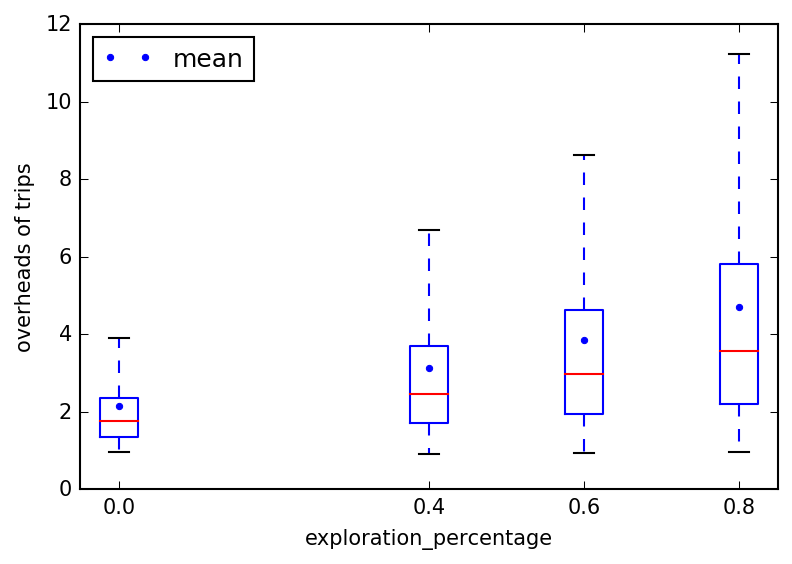

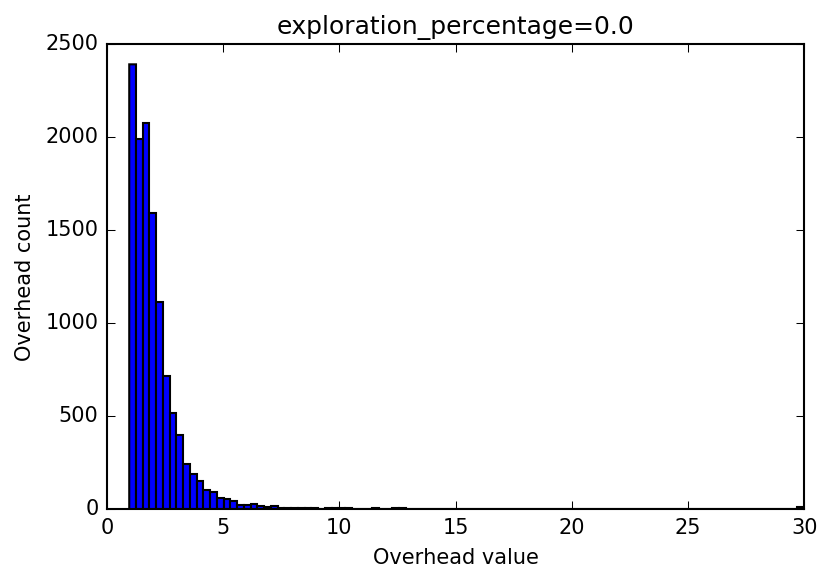

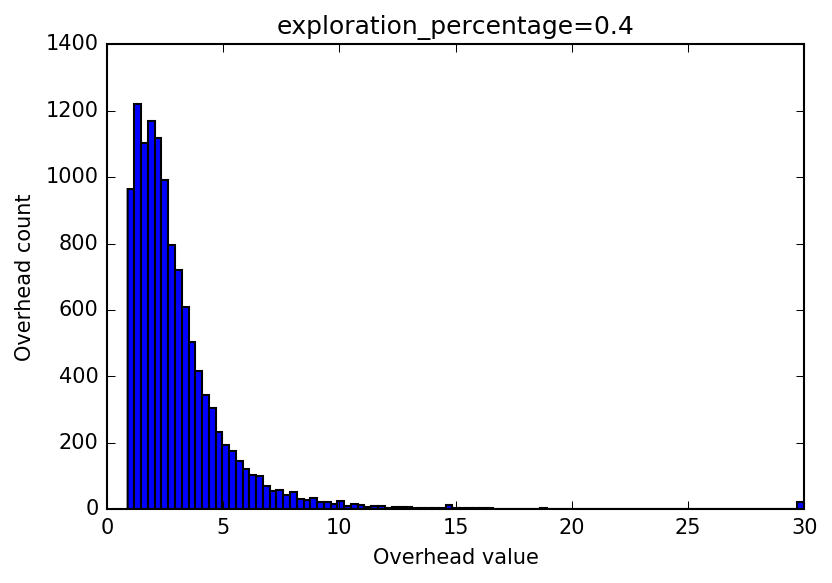

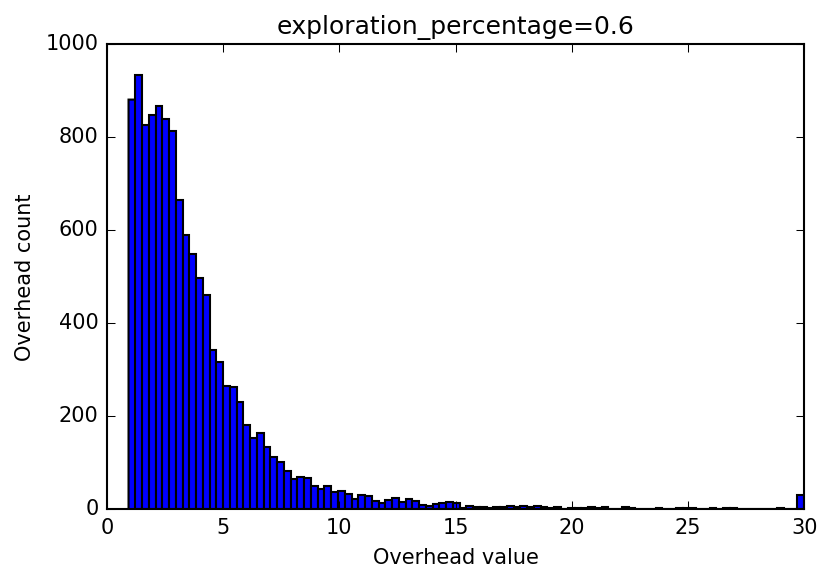

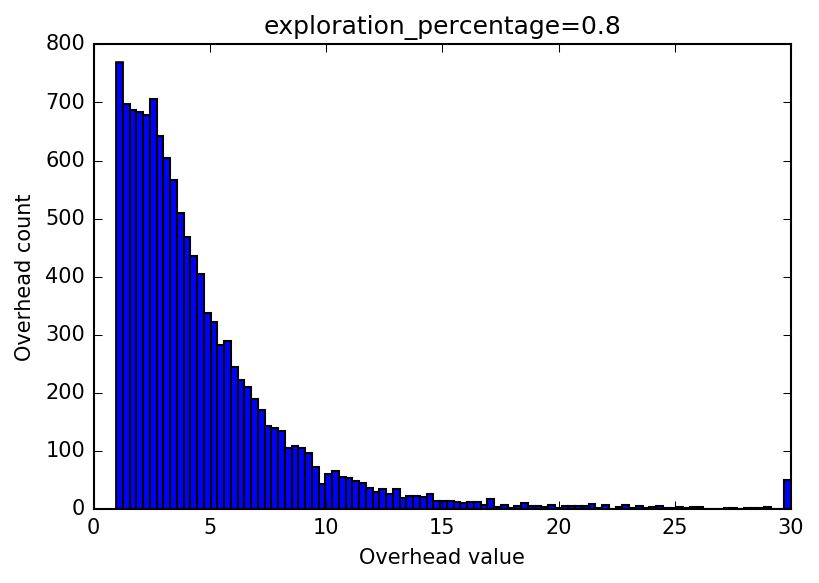

In [43]:
import matplotlib.pyplot as plt
from numpy import var, std, mean, median
import matplotlib as mpl
mpl.rc("savefig", dpi=150)

y_key = 'overhead'

sample_size = 12000
keys = [0, 4, 6, 8]

means = []
all_data = []

for i in keys:
    analysis_data = [r[y_key] for r in data[i]][:sample_size]
    all_data.append(analysis_data)
    means.append(mean(analysis_data))
        
fig,ax = plt.subplots()
ax.plot(keys,means, ".", label='mean')
ax.boxplot(all_data, 0, '', positions=keys)
plt.xticks(keys, ["0."+str(k) for k in keys])
plt.legend(loc='best')
plt.ylabel('overheads of trips')
plt.xlabel('exploration_percentage')
plt.show()

for i in range(len(all_data)):
    plt.figure()
    plt.hist(all_data[i], 100) 
    plt.ylabel('Overhead count')
    plt.xlabel('Overhead value')
    plt.title('exploration_percentage=' + "0."+str(keys[i]))
    plt.show()

[0.6728841026617367, 0.16281187113160658, 0.38483204444356967]


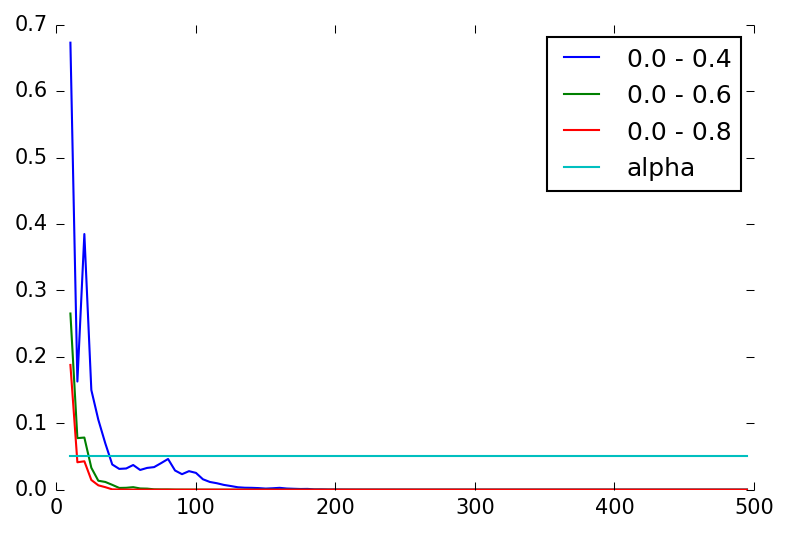

In [50]:
alpha = 0.01

fake_run_id = "123456"
comparison_keys = keys[1:]

sample_sizes = []
pvalues = {}

for i in keys:
    pvalues[i] = []

for threshold in range(10, 500, 5):
    sample_sizes.append(threshold)
    
    analysis_data = {}
    analysis_data[0] = data[0][:threshold]
    
    for i in comparison_keys:   
        analysis_data[1] = data[i][:threshold]
        t = Ttest(fake_run_id, y_key, alpha=alpha).start(analysis_data, {})
        pvalues[i].append(t["pvalue"])

markers = ['1','2','3','4','s','p','*','h','H']
marker_index = 0

print pvalues[4][:3]

fig,ax = plt.subplots()
for i in comparison_keys:
    ax.plot(sample_sizes,pvalues[i],label='0.0 - 0.'+str(i))
#     ax.plot(x,y[i],markers[marker_index],label='0 - 0.'+str(i))
    marker_index += 1
ax.plot(sample_sizes,[0.05]*len(sample_sizes), label='alpha')
#ax.set_clip_on(False)
ax.set_frame_on(False)
#ax.get_xaxis().tick_bottom()
#ax.axes.get_xaxis().set_visible(False)
plt.legend()
plt.show()

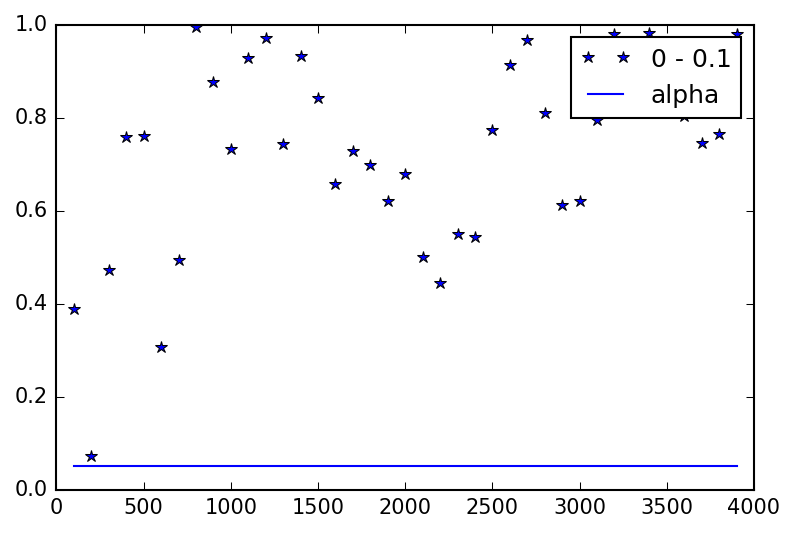

In [5]:
import matplotlib as mpl
mpl.rc("savefig", dpi=150)

i = 1
x = []
y = {}
y[i] = []
alpha = 0.05
        
for threshold in range(100, 4000, 100):
    x.append(threshold)
    
    analysis_data = {}
    analysis_data[0] = data[1][:threshold]
    analysis_data[1] = data[3][:threshold]
    
    t = Ttest(fake_run_id, y_key, alpha=alpha).start(analysis_data, {})
    y[i].append(t["pvalue"])

    
fig,ax = plt.subplots()
ax.plot(x,y[i],'b*',label='0 - 0.'+str(i))
ax.plot(x,[0.05]*len(x), label='alpha')

plt.legend()
plt.show()